# Assignment - Image Classification with CNNs
![CIFAR10](https://miro.medium.com/max/964/1*syyml8q8s1Yt-iEea5m1Ag.png)

[CIFAR 10](https://www.cs.toronto.edu/~kriz/cifar.html) is a small toy data set for image classifaction. 

* It has 60k images from ten diffenrent classes (like car, airplane, horse,..)
* The RGB images are of size 32x32 pixels  

In [1]:
#import needed libs
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os

#some vars to controll the training -> use them in your code
batch_size = 32
num_classes = 10 #fixed!
epochs = 10

# Get the data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


## Task:
* visualize some sample images from different classes
* build and train the ***AlexNet*** CNN architecture from the lecture, use the following Keras layers:
    * overview: https://keras.io/api/layers/
    * 2d convolution: https://keras.io/api/layers/convolution_layers/convolution2d/
    * Fully Connected (=Matrix Multiplication MLP): https://keras.io/api/layers/core_layers/dense/
    * Pooling: https://keras.io/api/layers/pooling_layers/max_pooling2d/   
* use 'relu' functions for the non-linear activation -> https://keras.io/api/layers/activation_layers/relu/
* optimize the learning hyper-paramters to get the best  test accuracy

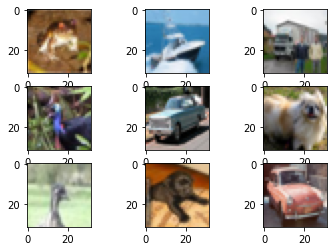

In [2]:
import matplotlib.pyplot as plt

for i in range(9):
	plt.subplot(330+i+1)
	plt.imshow(x_train[i*8])
plt.show()

In [3]:
model = keras.Sequential()

model.add(Conv2D(128, (3, 3), padding='same',input_shape=x_train.shape[1:])) 
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(264, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(512, (3, 3), padding='same'))
model.add(Activation('relu'))

model.add(Conv2D(512, (3, 3)))
model.add(Activation('relu'))

model.add(Conv2D(1024, (3, 3)))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten()) 
model.add(Dense(1024))
model.add(Activation('relu'))

model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [4]:
# Optimizer initialisieren und Modell ausführen
opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 128)       3584      
_________________________________________________________________
activation (Activation)      (None, 32, 32, 128)       0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 264)       304392    
_________________________________________________________________
activation_1 (Activation)    (None, 14, 14, 264)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 264)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 512)         1

In [6]:
#pre-processing: normalize data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [7]:
x_test.shape

(10000, 32, 32, 3)

In [8]:
y_test.shape

(10000, 10)

In [9]:
# shuffle nutzen, damit kein Auswendiglernen
%%time
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, shuffle=True)

Epoch 1/10
1563/1563 [==============================] - 74s 45ms/step - loss: 1.8052 - accuracy: 0.3303
Epoch 2/10
1563/1563 [==============================] - 70s 45ms/step - loss: 1.1473 - accuracy: 0.5929
Epoch 3/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.8704 - accuracy: 0.6949
Epoch 4/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.6925 - accuracy: 0.7579
Epoch 5/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.5658 - accuracy: 0.8053
Epoch 6/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.4572 - accuracy: 0.8393
Epoch 7/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.3759 - accuracy: 0.8715
Epoch 8/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.2959 - accuracy: 0.8974
Epoch 9/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.2232 - accuracy: 0.9238
Epoch 10/10
1563/1563 [==============================] - 70s 45m

In [10]:
# Scores berechnen
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

313/313 [==============================] - 4s 13ms/step - loss: 0.8501 - accuracy: 0.7839
Test loss: 0.8501480221748352
Test accuracy: 0.7839000225067139
